In [1]:
# libraries!
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import copy
import colorsys
import time

In [2]:
def getRGB(filename):
    """ reads a png or jpg file like 'flag.jpg' (a string)
        returns the pixels as a list-of-lists-of-lists
        this is accessible, but not fast: Use small images!
    """
    original = Image.open(filename)     # open the image
    print(f"Reading image from '{filename}':")
    print(f"  Format: {original.format}\n  Original Size: {original.size}\n  Mode: {original.mode}")
    max_dim = max(original.size)
    scale = max_dim/300
    new_size = tuple([round(x/scale) for x in original.size])
    print(f"WARNING:  New size is {new_size}")
    original = original.resize(new_size)
    WIDTH, HEIGHT = original.size
    px = original.load()
    PIXEL_LIST = []
    for r in range(HEIGHT):
        row = []
        for c in range(WIDTH):
            row.append( px[c,r][:3] )
        PIXEL_LIST.append( row )
    return PIXEL_LIST


In [5]:

values = getRGB("small.png")
values

Reading image from 'small.png':
  Format: PNG
  Original Size: (50, 50)
  Mode: RGB


[[(39, 138, 174),
  (39, 138, 174),
  (38, 138, 174),
  (37, 138, 174),
  (36, 138, 174),
  (34, 138, 174),
  (31, 138, 175),
  (29, 139, 175),
  (28, 139, 176),
  (27, 139, 176),
  (27, 140, 177),
  (27, 139, 178),
  (27, 140, 180),
  (28, 140, 181),
  (28, 141, 182),
  (28, 141, 182),
  (28, 142, 183),
  (28, 142, 183),
  (27, 142, 184),
  (27, 142, 184),
  (27, 143, 185),
  (27, 143, 185),
  (27, 144, 186),
  (27, 144, 186),
  (27, 145, 187),
  (27, 147, 187),
  (27, 148, 189),
  (27, 149, 191),
  (27, 150, 193),
  (27, 151, 195),
  (28, 152, 197),
  (28, 154, 199),
  (28, 155, 200),
  (28, 155, 201),
  (28, 155, 202),
  (28, 155, 202),
  (29, 155, 200),
  (29, 155, 201),
  (29, 155, 201),
  (29, 155, 201),
  (29, 155, 201),
  (29, 156, 201),
  (30, 156, 201),
  (30, 157, 202),
  (30, 157, 202),
  (30, 157, 202),
  (30, 157, 203),
  (30, 157, 204),
  (30, 157, 204),
  (30, 157, 205),
  (30, 157, 205),
  (30, 157, 205),
  (30, 157, 204),
  (30, 156, 203),
  (30, 156, 201),
  (31, 155

In [6]:
def set_size(width, height, ax=None):
    """Sets the size of an image when printing in the notebook
       w, h: width, height in inches 
    """
    w = width; h = height
    if not ax: 
        ax=plt.gca()  # gets current axes
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [7]:
# wrapper for matplotlib's show function
def show_image( rgbdata, hgt_in=None, wid_in=None ):
    """ shows an image whose pixels are in rgbdata 
        note:  rgbdata is a list-of-rows-of-pixels-of-rgb values, _not_ a filename!
            use getRGB() to get this data!
        hgt_in is the desired height (in inches)
        wid_in is the desired width (in inches)
            use set_size() with these parameters
        _but_ the library will not change the aspect ratio (takes the smaller)
        by default, the hgt_in and wid_in are 5.42 in.
        (and feel free to change these!)
    """
    fig, ax = plt.subplots()               # obtains the figure and axes objects
    im = ax.imshow(rgbdata)                # this is matplotlib's call to show an image 
    if hgt_in != None and wid_in == None:
        wid_in = hgt_in
    if hgt_in != None:
        set_size(width=wid_in, height=hgt_in)  # matplotlib will maintain the image's aspect ratio
    ax.axis('off')                         # turns off the axes (in units of pixels)
    plt.show()                             # show the image

## Our first image

First we call `rgbdata = getRGB(filename)` to get the pixel data as a list-of-lists-of-lists

Then we use the `show_image(rgbdata)` function to print the image in the notebook

In [8]:
curdir = %pwd
print(f"Here are all of the files in {curdir}\n")
%ls

Here are all of the files in c:\Users\brian\Desktop\HMC\Github Projects\Past-Projects\Image Transformations

 Volume in drive C is Windows
 Volume Serial Number is FA65-15A2

 Directory of c:\Users\brian\Desktop\HMC\Github Projects\Past-Projects\Image Transformations

10/18/2022  10:07 AM    <DIR>          .
10/18/2022  10:07 AM    <DIR>          ..
04/04/2021  05:57 PM           337,855 avengers.jpg
03/29/2021  12:19 PM            72,471 coffee.jpg
10/18/2022  10:08 AM         5,496,459 Filtering and Creating Images.ipynb
06/23/2020  03:54 PM           236,034 flag.jpg
03/29/2021  04:18 PM           393,122 flag.png
07/15/2022  07:41 AM           491,253 gs1.png
07/15/2022  07:41 AM           563,974 gs2.png
07/15/2022  07:59 AM           264,147 gs3.png
07/15/2022  10:04 AM               499 opencv_open_image.py
06/23/2020  03:54 PM             5,830 small.png
              10 File(s)      7,861,644 bytes
               2 Dir(s)  182,653,718,528 bytes free


Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


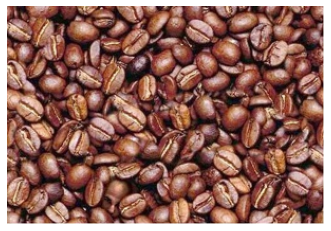

In [9]:
filename = "coffee.jpg"   # pick an image from the list above!
rgbdata = getRGB(filename)
show_image(rgbdata)   # show_image(rgbdata, 10)

## Manipulating RGB Data

Let's look at the "bits" of our images... first pixels (then bits themselves!)

Let's show the individual channels (r, g, and b)

For a given image, we can create three new images:
- Red values only: [42, 42, 42] becomes [42, 0, 0]
- Green values only: [42, 42, 42] becomes [0, 42, 0]
- Blue values only: [42, 42, 42] becomes [0, 0, 42]

In [10]:
def oneColor(pixel, color):
    """Changes a pixel to only have one color value
       makes other values 0"""
    
    if color == "red":
        r = pixel[0]
        pixel = [r,0,0]
        
    elif color == "green":
        g = pixel[1]
        pixel = [0,g,0]
        
    elif color == "blue":
        b = pixel[2]
        pixel = [0,0,b]
        
    else:
        print(f"didn't recognize color of {color}")
        
    return pixel

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

Running...

The original pixel in the top left corner is [ 48 132 164]
The red-only pixel in the top left corner is [48  0  0]
The green-only pixel in the top left corner is [  0 132   0]
The blue-only pixel in the top left corner is [  0   0 164]


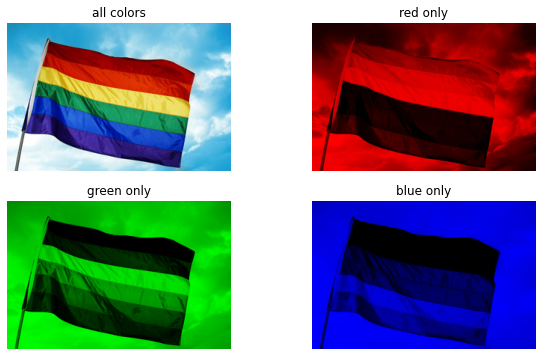

In [11]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array

print("\nRunning...\n")
image_r = np.apply_along_axis(oneColor, 2, rgbdata, "red")   # this applies the function oneColor to each pixel
image_g = np.apply_along_axis(oneColor, 2, rgbdata, "green") # this applies the function oneColor to each pixel
image_b = np.apply_along_axis(oneColor, 2, rgbdata, "blue")  # this applies the function oneColor to each pixel

print(f"The original pixel in the top left corner is {rgbdata[0][0]}")
print(f"The red-only pixel in the top left corner is {image_r[0][0]}")
print(f"The green-only pixel in the top left corner is {image_g[0][0]}")
print(f"The blue-only pixel in the top left corner is {image_b[0][0]}")

# let's show off how to create multiple images in one figure

fig, ax = plt.subplots(2,2, figsize=(10,6))   # this means ax will be a 2x2 numpy array of axes!

ax[0,0].imshow(rgbdata)  # very similar to show_image() function
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_r)  # need this so as not to use a color-colormap!
ax[0,1].axis('off')   
ax[0,1].set_title('red only')

ax[1,0].imshow(image_g, cmap='gray')
ax[1,0].axis('off')   
ax[1,0].set_title('green only')

ax[1,1].imshow(image_b, cmap='gray')
ax[1,1].axis('off')  
ax[1,1].set_title('blue only')

plt.show()

In [12]:

def grayscaleColor(pixel, color):
    """Changes a pixel to only have one color value
       makes other values 0"""
    
    if color == "red":
        r = pixel[0]
        pixel = [r,r,r]
        
    elif color == "green":
        g = pixel[1]
        pixel = [g,g,g]
        
    elif color == "blue":
        b = pixel[2]
        pixel = [b,b,b]
        
    else:
        print(f"didn't recognize color of {color}")
        
    return pixel

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

Running...

The original pixel in the top left corner is [ 48 132 164]
The red-only pixel in the top left corner is [48 48 48]
The green-only pixel in the top left corner is [132 132 132]
The blue-only pixel in the top left corner is [164 164 164]


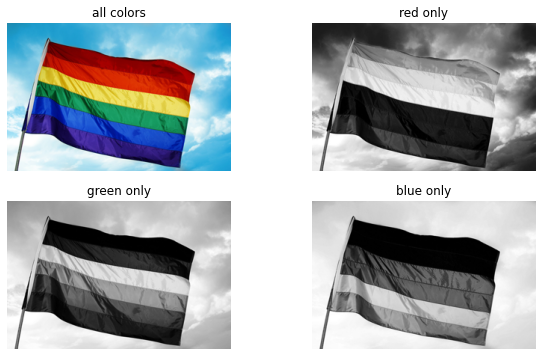

In [13]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array

print("\nRunning...\n")
image_r = np.apply_along_axis(grayscaleColor, 2, rgbdata, "red")
image_g = np.apply_along_axis(grayscaleColor, 2, rgbdata, "green")
image_b = np.apply_along_axis(grayscaleColor, 2, rgbdata, "blue")

print(f"The original pixel in the top left corner is {rgbdata[0][0]}")
print(f"The red-only pixel in the top left corner is {image_r[0][0]}")
print(f"The green-only pixel in the top left corner is {image_g[0][0]}")
print(f"The blue-only pixel in the top left corner is {image_b[0][0]}")

# let's show off how to create multiple images in one figure

fig, ax = plt.subplots(2,2, figsize=(10,6))   # this means ax will be a 2x2 numpy array of axes!

ax[0,0].imshow(rgbdata)  # very similar to show_image() function
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_r)  # need this so as not to use a color-colormap!
ax[0,1].axis('off')   
ax[0,1].set_title('red only')

ax[1,0].imshow(image_g, cmap='gray')
ax[1,0].axis('off')   
ax[1,0].set_title('green only')

ax[1,1].imshow(image_b, cmap='gray')
ax[1,1].axis('off')  
ax[1,1].set_title('blue only')

plt.show()

## Manipulating HSV Data

Introduce HSV (hue, saturation, value) "perceptual color space" (i.e., better aligned to human perception)

Note: HSV is a change-of-color-representation, _not_ a change of image content!!!

Nice illustration: https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html

In [14]:
def rgb2hsv(rgb):
    """Converts an RGB pixel (r/g/b: 0-255)
    to an HSV pixel (h: 0-360, s/v: 0-100)"""
    R, G, B = rgb[0]/255, rgb[1]/255, rgb[2]/255
    hsv = colorsys.rgb_to_hsv(R,G,B)
    return [round(hsv[0]*360, 2), round(hsv[1]*100, 2), round(hsv[2]*100, 2)]

In [15]:
rgb = [10, 20, 50]
print(f"RGB pixel is {rgb}")
print(f"HSV pixel is {rgb2hsv(rgb)}")

RGB pixel is [10, 20, 50]
HSV pixel is [225.0, 80.0, 19.61]


In [16]:
def hsv2rgb(hsv):
    """Converts an HSV pixel (h: 0-360, s/v: 0-100)
    to an RGB pixel (r/g/b: 0-255)"""
    H, S, V = hsv[0]/360, hsv[1]/100, hsv[2]/100
    return list(round(i * 255) for i in colorsys.hsv_to_rgb(H,S,V))

In [17]:
hsv = [225, 80, 19.61]
print(f"HSV pixel is {hsv}")
print(f"RGB pixel is {hsv2rgb(hsv)}")

HSV pixel is [225, 80, 19.61]
RGB pixel is [10, 20, 50]


In [18]:
def halveAttribute(pixel, att):
    """Changes a pixel by halving an HSV attribute
       leaves other values alone"""
    
    if att == "hue":
        h, s, v = pixel
        pixel = [h/2, s, v]
        
    elif att == "saturation":
        h, s, v = pixel
        pixel = [h, s/2, v]
        
    elif att == "value":
        h, s, v = pixel
        pixel = [h, s, v/2]
        
    return pixel

In [19]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array
print("\n..........")
hsvdata = np.apply_along_axis(rgb2hsv, 2, rgbdata)   # convert to hsv
print("Data converted to HSV format")
print("..........")

# modify hsv data by halving an attribute
image_h = np.apply_along_axis(halveAttribute, 2, hsvdata, "hue")
image_s = np.apply_along_axis(halveAttribute, 2, hsvdata, "value")
image_v = np.apply_along_axis(halveAttribute, 2, hsvdata, "saturation")
print("Attributes cut in half")
print("..........")

# convert back to rgb for matplotlib to display
image_h = np.apply_along_axis(hsv2rgb, 2, image_h).astype(int)
image_s = np.apply_along_axis(hsv2rgb, 2, image_s).astype(int)
image_v = np.apply_along_axis(hsv2rgb, 2, image_v).astype(int)
print("DONE")

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

..........
Data converted to HSV format
..........
Attributes cut in half
..........
DONE


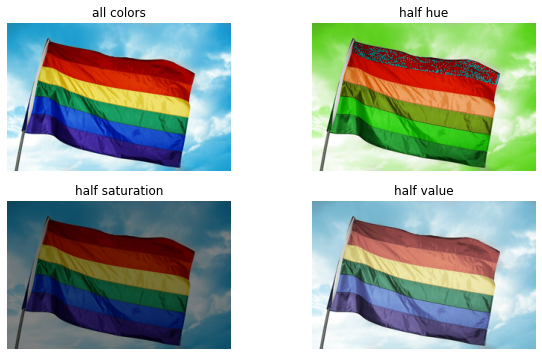

In [20]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0,0].imshow(rgbdata)
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_h)
ax[0,1].axis('off')   
ax[0,1].set_title('half hue')

ax[1,0].imshow(image_s)
ax[1,0].axis('off')   
ax[1,0].set_title('half saturation')

ax[1,1].imshow(image_v)
ax[1,1].axis('off')  
ax[1,1].set_title('half value')

plt.show()

# Image Filters

- `max_green()` maximizes (255) the green value of a pixel _**if**_ the original value contains a "1"
- `binary_green()` converts the base-10 green value of a pixel to an 8-bit binary string (42 --> "00101010"), changes the first and last bit to a "1" ("00101010 --> "10101011"), and then converts back to base-10 ("10101011" --> 171)
- `hsv_green()` converts an image to HSV and maximizes the green value of a pixel _**if**_ the h value is between 120 and 240 (degrees) 

In [21]:
def max_green_w1( image_rgb ):
    """ an example of a pixel-by-pixel filter 
            this one sets to "max green" any pixel with a '1' (a one digit) in its (decimal) green value
            [42, 42, 42]  --> [42, 42, 42]
            [42, 142, 42] --> [42,255,42]
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = copy.deepcopy(image_rgb)   # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            green_as_str = str(g)
            if '1' in green_as_str:   # not in photoshop! :-) 
                image_new[row][col] = [r,255,b]
            else:
                image_new[row][col] = [r,g,b]     
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


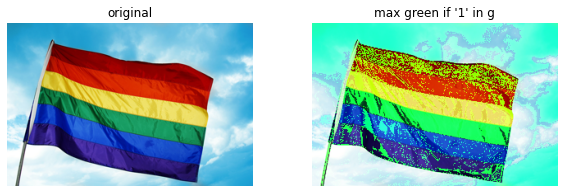

In [22]:
image_rgb = getRGB("flag.jpg")
image_new = max_green_w1(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title("max green if '1' in g")

plt.show()

In [23]:
def binary_green( image_rgb ):
    """ an example of a pixel-by-pixel filter:  
            this one sets the "bottom two bits" of each green value to zeros, e.g.,
            old green value:   '00101010'   # always 8 bits...
            new green value:   '10101011'   # always 8 bits, starting and ending with a 1
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = copy.deepcopy(image_rgb)         # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            # remember:  we can do anything with the pixel data... here, let's convert to binary
            
            green_in_binary = bin(g)[2:]
            nbits = len(green_in_binary)    # to make sure we have 8 bits...
            green_in_binary = '0'*(8-nbits) + green_in_binary
            green_in_binary = '1' + green_in_binary[1:-1] + '1'
            
            new_g = int(green_in_binary, 2)  # convert back to base 10 (did you know that int() could do that?)
            
            image_new[row][col] = r, new_g, b
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


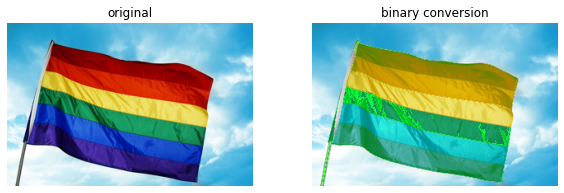

In [24]:
image_rgb = getRGB("flag.jpg") 
image_new = binary_green(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('binary conversion')

plt.show()

In [25]:
def hsv_green( image_rgb ):
    """ an example of a pixel-by-pixel filter that uses hsv (to detect green!)
        NOTE: the input and output are still rgb!!!
        We're simply _using_ the hsv representation in a meaningful way...
        
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = np.asarray(image_rgb)
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    image_hsv = np.apply_along_axis(rgb2hsv, 2, image_new)      # convert to hsv
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            h, s, v = image_hsv[row][col]   # the "old" pixel's hsv
            
            if 40<h<60:  # let's call this "green"
                image_new[row][col] = [0,255,0]  # maximize its greenness
            else:
                pass  # don't change the original pixel otherwise...   
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


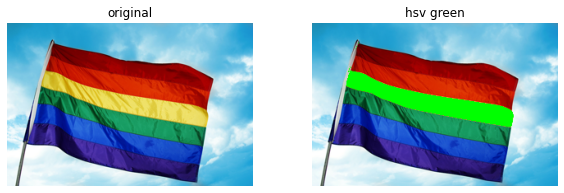

In [26]:
image_rgb = getRGB("flag.jpg") 
image_new = hsv_green(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('hsv green')

plt.show()

In [27]:
def new_rgb_filter( image_rgb ):
    """ This filter blurs the given image and returns it to us! """
    
    image_new = copy.deepcopy(image_rgb)         # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(1, num_rows - 1):             # loop over each row
        for col in range(1, num_cols - 1):         # loop over each column
            m_r, m_g, m_b = image_rgb[row][col] # the middle pixel
    
            ul_r, ul_g, ul_b = image_rgb[row - 1][col - 1] # upper left
            u_r, u_g, u_b = image_rgb[row][col - 1] # upper
            ur_r, ur_g, ur_b = image_rgb[row + 1][col - 1] # upper right
            
            l_r, l_g, l_b = image_rgb[row - 1][col] # left
            r_r, r_g, r_b = image_rgb[row + 1][col] # right
            
            ll_r, ll_g, ll_b = image_rgb[row + 1][col - 1] # lower left
            l_r, l_g, l_b = image_rgb[row + 1][col] # lower
            lr_r, lr_g, lr_b = image_rgb[row - 1][col + 1] # lower right
            
            m_r = int(.0625 * ul_r + .125 * u_r + .0625 * ur_r + .125 * l_r + .25 * m_r + .125 * r_r + .0625 * ll_r + .125 * l_r + .0625 * lr_r)
            m_g = int(.0625 * ul_g + .125 * u_g + .0625 * ur_g + .125 * l_g + .25 * m_g + .125 * r_g + .0625 * ll_g + .125 * l_g + .0625 * lr_g)
            m_b = int(.0625 * ul_b + .125 * u_b + .0625 * ur_b + .125 * l_b + .25 * m_b + .125 * r_b + .0625 * ll_b + .125 * l_b + .0625 * lr_b)

            image_new[row][col] = (m_r, m_g, m_b)

#             r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            
    return image_new



Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


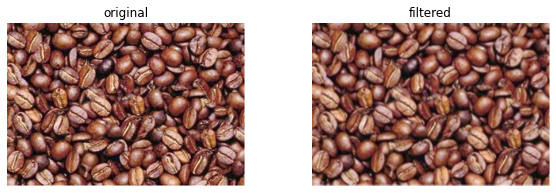

In [28]:
image_rgb = getRGB("coffee.jpg") 
image_new = new_rgb_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('filtered')

plt.show()

In [29]:
def new_hsv_filter( image_rgb ):
    """ Convert colors in a similar gradient to solid colors. For example, different shades of reds (as long as they are 
    close together) will be represented as one solid, red color. """
    
    image_new = np.asarray(image_rgb)
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    image_hsv = np.apply_along_axis(rgb2hsv, 2, image_new)   # convert to hsv
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            h, s, v = image_hsv[row][col]   # the "old" pixel's hsv
            
            if h < 10 or h > 350:  # red
                image_hsv[row][col] = [255,0,0]  # maximize its greenness
            elif 20 < h < 40 :  # orange
                image_new[row][col] = [255,127,0]  # maximize its greenness
            elif 50 < h < 70 :  # yellow
                image_new[row][col] = [255,255,0]  # maximize its greenness
            elif 90 < h < 150 :  # green
                image_new[row][col] = [0,255,0]  # maximize its greenness
            elif 180 < h < 240 :  # blue
                image_new[row][col] = [0,0,255]  # maximize its greenness
            elif 241 < h < 270 :  # indigo
                image_new[row][col] = [75,0,130]  # maximize its greenness
            elif 271 < h < 300 :  # violet
                image_new[row][col] = [148,0,211]  # maximize its greenness
            
            #
            # Write something HERE
            #
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


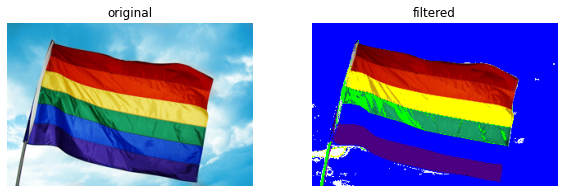

In [30]:
image_rgb = getRGB("flag.jpg") 
image_new = new_hsv_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('filtered')

plt.show()

## More Filters

- `two_image_min()` combines both pictures by taking the minimum value between pixels. For example, if image-1 has pixel [10, 100, 130] and image-2 has pixel [42, 42, 20] in the same location, the new image will have pixel [10, 42, 20] in that location

- `time_image_overlap()` is more straightforward. It takes image-2 and puts it on top of image-1 at coordinates (where the top left corner is the origin) you can specify

In [35]:
def two_image_min( image_rgb1, image_rgb2 ):
    """ an example of a two-image pixel-by-pixel filter
            this takes the componentwise min! hmmm...
        input: two r, g, b images
        output: a transformed r, g, b image (the "min image")
    """
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    # create a blank image
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 
    # uint8 means unsigned 8-bit integer (0-255) 
    
    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb

            r = min(r1, r2)
            g = min(g1, g2)
            b = min(b1, b2)
            
            image_new[row][col] = [r,g,b]
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


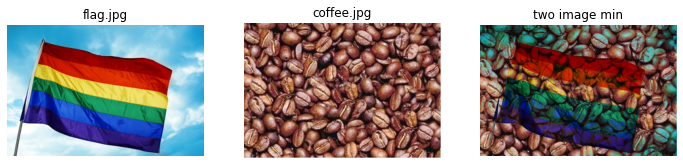

In [36]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = two_image_min(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two image min')

plt.show()

In [37]:
def two_image_overlap( image_rgb1, image_rgb2, ulx, uly ):
    """ an example of a two-image pixel-by-pixel filter
            puts im2 on top of im1 at upper-left-x (ulx) (col) and upper-left-y (uly) (row)
            the resulting size is image_rgb1 (the rest of image_rgb2 is dropped...)
        input: two r, g, b images
        output: a transformed r, g, b image (the "overlap image")
    """    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    image_new = copy.deepcopy(image_rgb1)  # not symmetric! image_rgb1 is the "background"
    
    max_row = min(num_rows1,uly+num_rows2) # no more than num_rows1
    max_col = min(num_cols1,ulx+num_cols2) # no more than num_cols1 
    
    for row in range(uly,max_row):
        for col in range(ulx,max_col):
            image_new[row][col] = image_rgb2[row-uly][col-ulx]  # put 2nd image over 1st
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


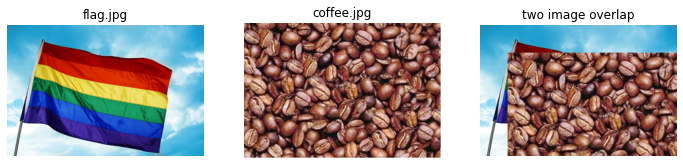

In [39]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = two_image_overlap(image_rgb1,image_rgb2,42,42)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two image overlap')

plt.show()

In [40]:
def new_rgb_filter_two( image_rgb1, image_rgb2 ):
    """ returns one image that is like a 'criss cross' of both inputted images.  """
    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    # create a blank image
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 
    # uint8 means unsigned 8-bit integer (0-255) 
    
    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb
            
            if row < num_rows // 2 and col < num_cols // 2:
                r, g, b = r1, g1, b1
            if row < num_rows // 2 and col >= num_cols // 2:
                r, g, b = r2, g2, b2
            if row > num_rows // 2 and col < num_cols // 2:
                r, g, b = r2, g2, b2
            if row > num_rows // 2 and col >= num_cols // 2:
                r, g, b = r1, g1, b1

            image_new[row][col] = [r,g,b]
                
    return image_new  # not yet a combination!  (see above...)

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


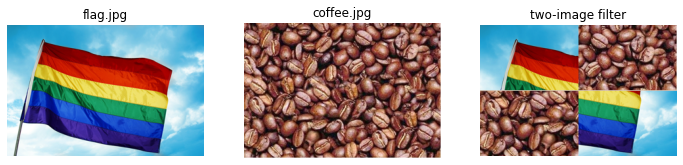

In [42]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_rgb_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two-image filter')

plt.show()

In [43]:
def new_hsv_filter_two( image_rgb1, image_rgb2 ):
    """ returns one image that is like a 'criss cross' of both inputted images.  """
    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 

    image_hsv1 = np.apply_along_axis(rgb2hsv, 2, image_rgb1)   # convert to hsv
    image_hsv2 = np.apply_along_axis(rgb2hsv, 2, image_rgb2)   # convert to hsv

    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb
            
            h1, s1, v1 = image_hsv1[row][col]   # the "old" pixel's hsv
            h2, s2, v2 = image_hsv2[row][col]   # the "old" pixel's hsv

            
#             r = max(r1, r2)
#             g = max(g1, g2)
#             b = max(b1, b2)
            
            if v2 > v1:
                r, g, b = r2, g2, b2
            else:
                r, g, b = r1, g1, b1
            
            image_new[row][col] = [r,g,b]
                
    return image_new  # not yet a combination!  (see above...)

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


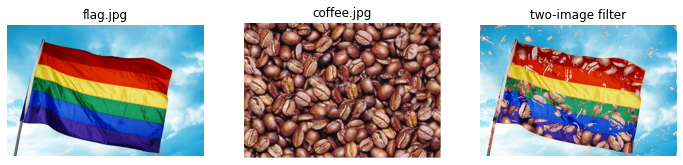

In [44]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_hsv_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two-image filter')

plt.show()